In [1]:
#########################
##                     ##
## Irving Gomez Mendez ##
##    March 03, 2021   ##
##                     ##
#########################

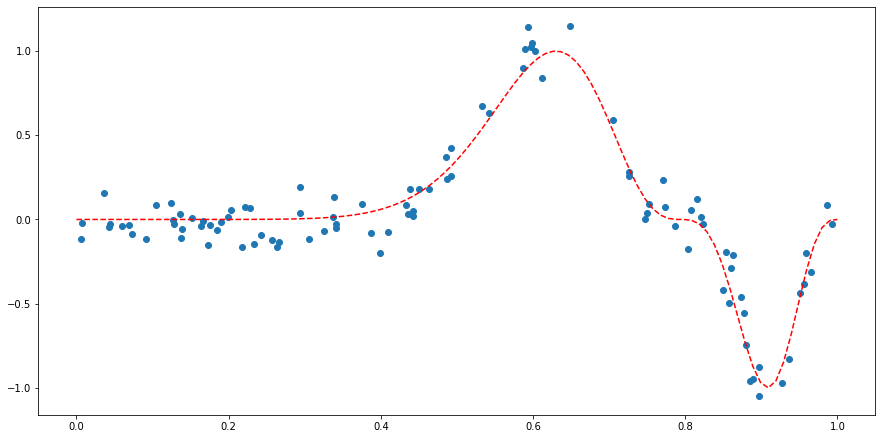

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform

from localreg import *

# m(x) = e_1.T(X_x.T W_x X_x)**(-1) @ (X_x.T W_x Y)

def m(x):
    return (np.sin(2*np.pi*x**3))**3

n = 100
h = 0.024
epsilon = norm.rvs(scale=0.1, size=n)
x_dat = uniform.rvs(size=n)
y = np.array([m(xx) for xx in x_dat])

x_vect = np.linspace(0,1,100)
m_vect =  [m(xx) for xx in x_vect]

y_dat = y+epsilon

plt.figure(figsize=(15,7.5))
plt.scatter(x_dat, y+epsilon)
plt.plot(x_vect, m_vect, 'r--')
plt.show()

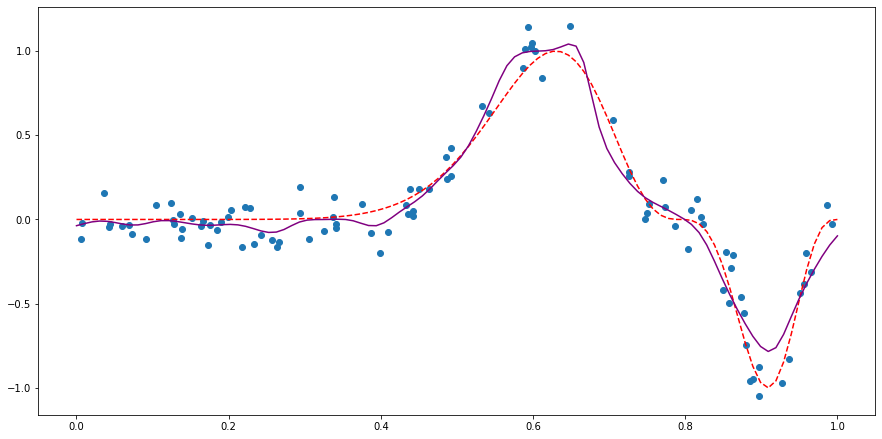

In [9]:
def hat_m(x):
    XX = np.vstack([np.ones(n),(x_dat-x)]).T
    W = np.diag(norm.pdf((x_dat-x)/h))
    beta_0 = np.linalg.solve(XX.T @ W @ XX, XX.T @ W @ y_dat)[0]
    return(beta_0)

hat_m_vect = [hat_m(xx) for xx in x_vect]

plt.figure(figsize=(15,7.5))
plt.scatter(x_dat, y+epsilon)
plt.plot(x_vect, m_vect, 'r--')
plt.plot(x_vect, hat_m_vect, 'purple')
plt.show()

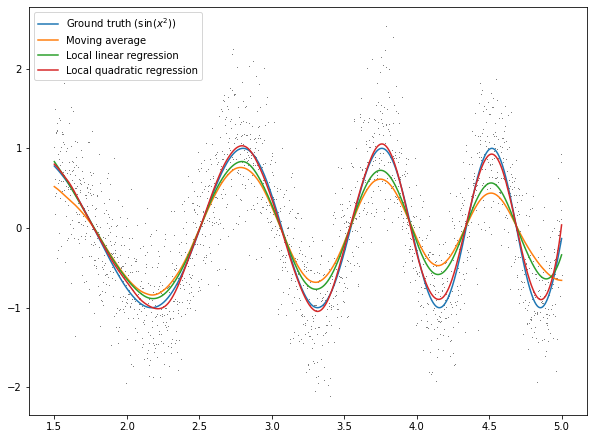

In [16]:
np.random.seed(1234)
x = np.linspace(1.5, 5, 2000)
yf = np.sin(x*x)
y = yf + 0.5*np.random.randn(*x.shape)

y0 = localreg(x, y, degree=0, kernel=rbf.epanechnikov, radius=0.3)
y1 = localreg(x, y, degree=1, kernel=rbf.tricube, radius=0.3)
y2 = localreg(x, y, degree=2, kernel=rbf.tricube, radius=0.3)


plt.figure(figsize=(10,7.5))
plt.plot(x, y, '+', markersize=0.6, color='gray')
plt.plot(x, yf, label='Ground truth ($\sin(x^2)$)')
plt.plot(x, y0, label='Moving average')
plt.plot(x, y1, label='Local linear regression')
plt.plot(x, y2, label='Local quadratic regression')
plt.legend()